<a href="https://colab.research.google.com/github/gregorywmorris/MLZoom2022/blob/main/capstone-1/LendingClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Auto-save / Auto-reload
%autosave 1

%load_ext autoreload
%autoreload 2

Autosaving every 1 seconds


# Environment set-up and data import

## PIP

In [13]:
!pip install writefile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install bentoml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 3.0.0
    Uninstalling Jinja2-3.0.0:
      Successfully uninstalled Jinja2-3.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
distributed 2022.2.1 requires dask==2022.02.1, but you have dask 2022.12.1 which is incompatible.
dataprep 0.4.5 requires jinja2<3.1,>=3.0, but you have jinja2 3.1.2 which is incompatible.


In [15]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install writefile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataprep

In [20]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.0.3-py3-none-any.whl (133 kB)
  Using cached Jinja2-3.0.0-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.2.1 requires dask==2022.02.1, but you have dask 2022.12.1 which is incompatible.
bentoml 1.0.12 requires Jinja2>=3.0.1, but you have jinja2 3.0.0 which is incompatible.


## Envrionment

In [169]:
import numpy as np
import pandas as pd
from dataprep.eda import create_report, plot, plot_correlation
import sys

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt # https://scikit-plot.readthedocs.io/en/stable/Quickstart.htm
from IPython.display import display

# models
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import ComplementNB

# tuning and metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix, roc_auc_score

# Deployment
import bentoml

In [22]:
sys.setrecursionlimit(15000)

In [23]:
data1 = "https://raw.githubusercontent.com/gregorywmorris/MLZoom2022/main/capstone-1/lendingclub-1.csv"

In [24]:
data2 = "https://raw.githubusercontent.com/gregorywmorris/MLZoom2022/main/capstone-1/lendingclub-2.csv"

In [25]:
!wget $data1 -O lendingclub-1.csv

--2022-12-22 13:17:35--  https://raw.githubusercontent.com/gregorywmorris/MLZoom2022/main/capstone-1/lendingclub-1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13161065 (13M) [text/plain]
Saving to: ‘lendingclub-1.csv’

lendingclub-1.csv   100%[===================>]  12.55M  --.-KB/s    in 0.1s    

2022-12-22 13:17:36 (93.4 MB/s) - ‘lendingclub-1.csv’ saved [13161065/13161065]



In [26]:
!!wget $data2 -O lendingclub-2.csv

['--2022-12-22 13:17:37--  https://raw.githubusercontent.com/gregorywmorris/MLZoom2022/main/capstone-1/lendingclub-2.csv',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 15921810 (15M) [text/plain]',
 'Saving to: ‘lendingclub-2.csv’',
 '',
 '',
 'lendingclub-2.csv     0%[                    ]       0  --.-KB/s               ',
 'lendingclub-2.csv   100%[===================>]  15.18M  --.-KB/s    in 0.1s    ',
 '',
 '2022-12-22 13:17:38 (111 MB/s) - ‘lendingclub-2.csv’ saved [15921810/15921810]',
 '']

In [27]:
part1 = pd.read_csv("lendingclub-1.csv")

In [28]:
part2 = pd.read_csv("lendingclub-2.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
bothParts = [part1,part2]
df = pd.concat(bothParts)

In [30]:
pd.options.display.max_columns = None

# EDA

## Data Cleaning / Preprocessing

In [31]:
df.isnull().sum()

id                       42537
member_id                42538
loan_amnt                    3
funded_amnt                  3
funded_amnt_inv              3
                         ...  
settlement_status        42378
settlement_date          42378
settlement_amount        42378
settlement_percentage    42378
settlement_term          42378
Length: 144, dtype: int64

In [32]:
df.shape

(42538, 144)

In [33]:
# drop columns that have 1 to no values
for col in df.columns:
  if df[col].isna().sum() >= 42537:
    df.drop(col,inplace=True,axis=1)

In [34]:
# confirm dropped columns
df.shape

(42538, 62)

In [35]:
# check dtypes
df.dtypes

loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
term                      object
int_rate                  object
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 62, dtype: object

In [36]:
for obj in df.columns[df.dtypes == 'O']:
    print(df[obj].value_counts())
    print('************************')

 36 months    31534
 60 months    11001
Name: term, dtype: int64
************************
10.99%    970
11.49%    837
13.49%    832
7.51%     787
7.88%     742
         ... 
17.46%      1
21.48%      1
24.40%      1
16.83%      1
16.20%      1
Name: int_rate, Length: 394, dtype: int64
************************
B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64
************************
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64
************************
US Army                             139
Bank of America                     115
IBM                                  72
K

In [37]:
# drop columns that either do no add informaiton or are documeted as part of the label 'loan_status'
dropCatColumn = ['settlement_date','settlement_status','debt_settlement_flag','debt_settlement_flag_date','hardship_flag','application_type','next_pymnt_d','last_pymnt_d','initial_list_status','zip_code', 'addr_state', 'title',
                 'desc','pymnt_plan','issue_d','term','int_rate']

In [38]:
df.drop(dropCatColumn,inplace=True,axis=1)

In [39]:
for floats in df.columns[df.dtypes == 'float64']:
    print(df[floats].value_counts())
    print('************************')

10000.0    3016
12000.0    2439
5000.0     2260
6000.0     2037
15000.0    2012
           ... 
10350.0       1
19100.0       1
17975.0       1
31150.0       1
20425.0       1
Name: loan_amnt, Length: 898, dtype: int64
************************
10000.0    2924
12000.0    2347
5000.0     2247
6000.0     2023
15000.0    1897
           ... 
23625.0       1
19625.0       1
21425.0       1
27750.0       1
850.0         1
Name: funded_amnt, Length: 1051, dtype: int64
************************
5000.000000     1369
10000.000000    1302
6000.000000     1241
12000.000000    1084
8000.000000      929
                ... 
5480.733306        1
14276.431140       1
10141.459840       1
10019.969440       1
1099.996405        1
Name: funded_amnt_inv, Length: 9244, dtype: int64
************************
311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
357.77     1
809.53     1
48.93      1
405.46     1
204.84     1
Name: installment, Length: 16459, dtype: int64
*************

In [40]:
# Future date/post approval, missing too much data to extrapolate
dropFloats = ['settlement_term','settlement_percentage','settlement_amount','delinq_amnt','acc_now_delinq','policy_code','chargeoff_within_12_mths','collections_12_mths_ex_med','last_pymnt_amnt','collection_recovery_fee','total_rec_late_fee','total_rec_int',
              'total_rec_prncp','total_pymnt_inv','total_pymnt','out_prncp_inv','out_prncp','mths_since_last_record','installment','funded_amnt_inv','funded_amnt','loan_amnt']

In [41]:
df.drop(dropFloats,inplace=True,axis=1)

In [42]:
df.shape

(42538, 23)

In [43]:
df.isna().sum()

grade                         3
sub_grade                     3
emp_title                  2629
emp_length                 1115
home_ownership                3
annual_inc                    7
verification_status           3
loan_status                   3
purpose                       3
dti                           3
delinq_2yrs                  32
earliest_cr_line             32
inq_last_6mths               32
mths_since_last_delinq    26929
open_acc                     32
pub_rec                      32
revol_bal                     3
revol_util                   93
total_acc                    32
recoveries                    3
last_credit_pull_d            7
pub_rec_bankruptcies       1368
tax_liens                   108
dtype: int64

In [44]:
# target value, we cannot use observations missing this value.
df[df['loan_status'].isnull()]

grade sub_grade emp_title emp_length home_ownership  annual_inc  \
18286   NaN       NaN       NaN        NaN            NaN         NaN   
18287   NaN       NaN       NaN        NaN            NaN         NaN   
18288   NaN       NaN       NaN        NaN            NaN         NaN   

      verification_status loan_status purpose  dti  delinq_2yrs  \
18286                 NaN         NaN     NaN  NaN          NaN   
18287                 NaN         NaN     NaN  NaN          NaN   
18288                 NaN         NaN     NaN  NaN          NaN   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  \
18286              NaN             NaN                     NaN       NaN   
18287              NaN             NaN                     NaN       NaN   
18288              NaN             NaN                     NaN       NaN   

       pub_rec  revol_bal revol_util  total_acc  recoveries  \
18286      NaN        NaN        NaN        NaN         NaN   
18287      NaN        NaN        NaN        NaN         NaN   
18288      NaN        NaN        NaN        NaN         NaN   

      last_credit_pull_d  pub_rec_bankruptcies  tax_liens  
18286                NaN                   NaN        NaN  
18287                NaN                   NaN        NaN  
18288                NaN                   NaN        NaN

In [45]:
# This reolves the missing target value, missing grade, and missing dti values
df.drop([18286,18287,18288], inplace=True)

In [46]:
# It is reasonable to assume that no entry is likely a lack of occurance for these fields, although it could be a data entry error. It is unlikey the lendor did not look for these on the credit history.
zero_out = ['tax_liens','pub_rec_bankruptcies','recoveries','mths_since_last_delinq','delinq_2yrs','inq_last_6mths','pub_rec']

for zOut in zero_out:
  df[zOut].fillna(0.0,inplace=True)

In [47]:
df.emp_title.value_counts()

US Army                             139
Bank of America                     115
IBM                                  72
AT&T                                 61
Kaiser Permanente                    61
                                   ... 
Regional Elite Airlines Services      1
Mass General Medical Group            1
Kontera                               1
Southeast Georgia Health ystem        1
Homemaker                             1
Name: emp_title, Length: 30656, dtype: int64

In [48]:
# emp_title is too diverse, rather it has too high cardinality, to be of use. Possible categorization, however 30k+ values makes that impraticle at this time.
df.drop('emp_title',axis=1,inplace=True)

In [49]:
df.home_ownership.value_counts()

RENT        20180
MORTGAGE    18957
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [50]:
# NONE is ambiguous, OTHER category better fits homeless and those living with others.
df['home_ownership'].replace('NONE','OTHER',inplace=True)

In [51]:
df['home_ownership'].fillna('OTHER')
df.home_ownership.value_counts()

RENT        20180
MORTGAGE    18957
OWN          3251
OTHER         144
Name: home_ownership, dtype: int64

In [52]:
df.purpose.value_counts()

debt_consolidation    19775
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2310
small_business         1991
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

In [53]:
# Replace empty fields with other category
purposeNULL = df.purpose.isna()
df = df.replace(purposeNULL,'other')

In [54]:
df.isna().sum()

grade                        0
sub_grade                    0
emp_length                1112
home_ownership               0
annual_inc                   4
verification_status          0
loan_status                  0
purpose                      0
dti                          0
delinq_2yrs                  0
earliest_cr_line            29
inq_last_6mths               0
mths_since_last_delinq       0
open_acc                    29
pub_rec                      0
revol_bal                    0
revol_util                  90
total_acc                   29
recoveries                   0
last_credit_pull_d           4
pub_rec_bankruptcies         0
tax_liens                    0
dtype: int64

In [55]:
df.last_credit_pull_d.value_counts()

Jun-19    8445
Oct-16    3860
May-19    1073
Apr-19     819
Mar-19     700
          ... 
Dec-07       2
Feb-08       2
Jul-08       1
Jun-08       1
Jul-07       1
Name: last_credit_pull_d, Length: 143, dtype: int64

earliest_cr_line and last_credit_pull_d are date based and will be removed for now. They would be of greater use as categories for time periods of age of accounts.

In [56]:
dates = ['earliest_cr_line','last_credit_pull_d']
df.drop(dates,axis=1,inplace=True)

In [57]:
# percentages are not in numerical dtype
df.revol_util.value_counts

<bound method IndexOpsMixin.value_counts of 0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
21033       NaN
21034       NaN
21035       NaN
21036       NaN
21037       NaN
Name: revol_util, Length: 42532, dtype: object>

In [58]:
df.revol_util = df.revol_util.str.replace('%', '')

In [59]:
df['revol_util'] = pd.to_numeric(df.revol_util, errors='coerce')

In [60]:
for floats in df.columns[df.dtypes == 'float64']:
    print(df[floats].value_counts())
    print('************************')

60000.0     1591
50000.0     1119
40000.0      935
45000.0      898
30000.0      883
            ... 
108820.0       1
85634.0        1
126996.0       1
57110.0        1
6500.0         1
Name: annual_inc, Length: 5597, dtype: int64
************************
0.00     206
12.00     54
10.00     46
18.00     46
19.20     45
        ... 
28.04      1
27.44      1
26.87      1
27.58      1
28.43      1
Name: dti, Length: 2894, dtype: int64
************************
0.0     37797
1.0      3595
2.0       771
3.0       244
4.0        72
5.0        27
6.0        13
7.0         6
8.0         3
11.0        2
9.0         1
13.0        1
Name: delinq_2yrs, dtype: int64
************************
0.0     19684
1.0     11246
2.0      5987
3.0      3182
4.0      1056
5.0       596
6.0       339
7.0       182
8.0       115
9.0        50
10.0       24
11.0       15
12.0       15
15.0        9
13.0        6
14.0        6
18.0        4
16.0        3
17.0        2
24.0        2
19.0        2
32.0        1
33.0

In [61]:
# these columns will take the median value for fillna
median_fill = ['open_acc','pub_rec','total_acc','revol_util','annual_inc']
for med in median_fill:
   df[med].fillna(df[med].median(),inplace=True)

In [62]:
df.emp_length.isna().sum()

1112

In [63]:
# emp_length is a string categorical but based on numeric length of years
df.emp_length.value_counts()

10+ years    9369
< 1 year     5061
2 years      4743
3 years      4364
4 years      3649
1 year       3594
5 years      3457
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [64]:
# Note 1 year has is missing the 's'
df.emp_length = df.emp_length.str.replace('1 year','1 years')
df.emp_length.value_counts()

10+ years    9369
< 1 years    5061
2 years      4743
3 years      4364
4 years      3649
1 years      3594
5 years      3457
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [65]:
# For less than 1 year we will use 0.5. I am assuming it is a Gaussian distribution
median_employment = ((10*9369)+(0.5*5061)+(2*4753)+(3*4364)+(4*3649)+(1*3594)+(5*3494)+(6*2375)+(7*1875)+(7*1875)+(8*1592)+(9*1341))/(9369+5061+4743+4364+3649+3594+3457+2375+1875+1592+1341)
round(median_employment,0)

5.0

In [66]:
df.emp_length = df.emp_length.fillna('5 years')
df.emp_length.isna().sum()

0

In [67]:
df.emp_length.value_counts()

10+ years    9369
< 1 years    5061
2 years      4743
5 years      4569
3 years      4364
4 years      3649
1 years      3594
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [68]:
# Information is not diverse enough with only a single value diferentiation.
df.tax_liens.value_counts()

0.0    42531
1.0        1
Name: tax_liens, dtype: int64

In [69]:
df.drop('tax_liens',axis=1,inplace=True)

## Data Exploration

[Dataprep](https://docs.dataprep.ai/index.html) is an EDA and interactive vizualization api for python. 

### Dataprep Report

DataPrep Report
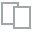
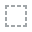
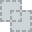
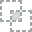
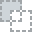
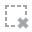
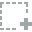
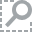
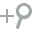
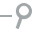
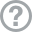
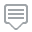
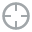
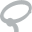
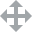
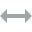
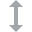
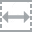
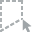
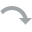
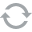
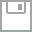
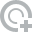
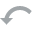
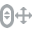
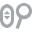
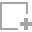
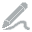
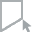
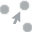
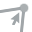
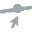

In [70]:
# Data statistics and visualizations
create_report(df)

### Detailed EDA


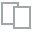
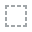
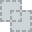
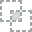
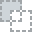
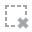
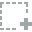
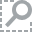
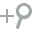
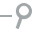
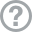
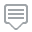
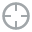
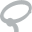
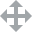
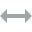
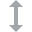
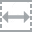
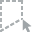
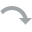
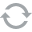
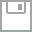
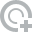
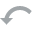
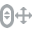
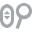
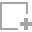
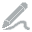
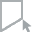
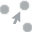
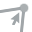
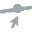

In [71]:
# correlation graphs
plot_correlation(df)

#### df.annual_inc


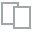
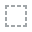
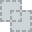
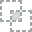
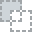
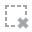
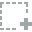
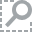
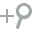
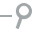
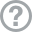
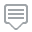
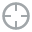
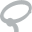
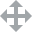
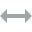
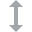
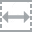
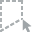
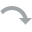
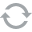
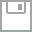
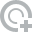
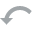
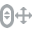
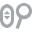
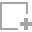
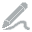
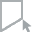
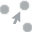
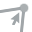
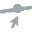

In [72]:
# From the stats and frequency chart, this may be better represented in categories. 
plot(df,'annual_inc')

In [73]:
income_bins = [0,30000,40000,50000,60000,70000,80000,100000,150000,6000001]
income_groups = ['under-30k','30-39k','40-49k','50-59k','60-69k','70-79k','80-100k','100-150000k','150000+']
df['income_level'] = pd.cut(df.annual_inc, bins=income_bins,labels=income_groups)

In [74]:
df['income_level'].value_counts()

40-49k         6279
50-59k         6095
30-39k         5599
under-30k      5092
80-100k        4992
60-69k         4480
100-150000k    4402
70-79k         3870
150000+        1723
Name: income_level, dtype: int64

In [75]:
df.income_level.isna().sum()

0

#### df.verification_status

In [76]:
df.verification_status.value_counts()

Not Verified       18757
Verified           13470
Source Verified    10305
Name: verification_status, dtype: int64

In [77]:
# verified values need to be combined
df.verification_status.replace('Source Verified','Verified',inplace=True)

In [78]:
df.verification_status.value_counts()

Verified        23775
Not Verified    18757
Name: verification_status, dtype: int64

#### Label Value df.loan_status


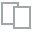
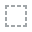
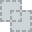
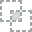
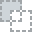
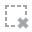
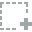
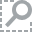
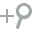
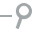
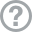
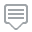
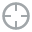
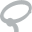
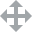
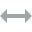
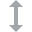
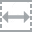
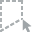
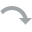
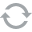
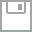
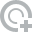
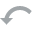
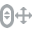
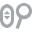
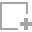
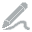
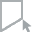
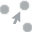
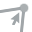
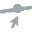

In [79]:
plot(df,'loan_status')

In [80]:
df.loan_status.value_counts()

Fully Paid                                             34114
Charged Off                                             5669
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [81]:
# This should be show as either Fully Paid or Charged Off
df.loan_status.replace('Does not meet the credit policy. Status:Fully Paid','Fully Paid',inplace=True)
df.loan_status.replace('Does not meet the credit policy. Status:Charged Off','Charged Off',inplace=True)
df.loan_status.value_counts()

Fully Paid     36102
Charged Off     6430
Name: loan_status, dtype: int64

In [82]:
df.loan_status = (df.loan_status == 'Fully Paid').astype(int)
df.loan_status.value_counts()

1    36102
0     6430
Name: loan_status, dtype: int64

In [83]:
df.loan_status.mean()

0.848819712216684

#### Final Review

In [84]:
df.describe()

annual_inc   loan_status           dti   delinq_2yrs  inq_last_6mths  \
count  4.253200e+04  42532.000000  42532.000000  42532.000000    42532.000000   
mean   6.913559e+04      0.848820     13.373312      0.152356        1.080739   
std    6.409517e+04      0.358229      6.726466      0.512264        1.527231   
min    1.896000e+03      0.000000      0.000000      0.000000        0.000000   
25%    4.000000e+04      1.000000      8.200000      0.000000        0.000000   
50%    5.900000e+04      1.000000     13.470000      0.000000        1.000000   
75%    8.250000e+04      1.000000     18.680000      0.000000        2.000000   
max    6.000000e+06      1.000000     29.990000     13.000000       33.000000   

       mths_since_last_delinq      open_acc       pub_rec     revol_bal  \
count            42532.000000  42532.000000  42532.000000  4.253200e+04   
mean                12.849408      9.343882      0.058097  1.429847e+04   
std                 21.661302      4.494860      0.245600  2.201907e+04   
min                  0.000000      1.000000      0.000000  0.000000e+00   
25%                  0.000000      6.000000      0.000000  3.636000e+03   
50%                  0.000000      9.000000      0.000000  8.821500e+03   
75%                 21.000000     12.000000      0.000000  1.725225e+04   
max                120.000000     47.000000      5.000000  1.207359e+06   

         revol_util     total_acc    recoveries  pub_rec_bankruptcies  
count  42532.000000  42532.000000  42532.000000          42532.000000  
mean      49.116994     22.123154    103.237687              0.043779  
std       28.333785     11.589290    737.195484              0.205522  
min        0.000000      1.000000      0.000000              0.000000  
25%       25.800000     13.000000      0.000000              0.000000  
50%       49.700000     20.000000      0.000000              0.000000  
75%       72.600000     29.000000      0.000000              0.000000  
max      119.000000     90.000000  29623.350000              2.000000

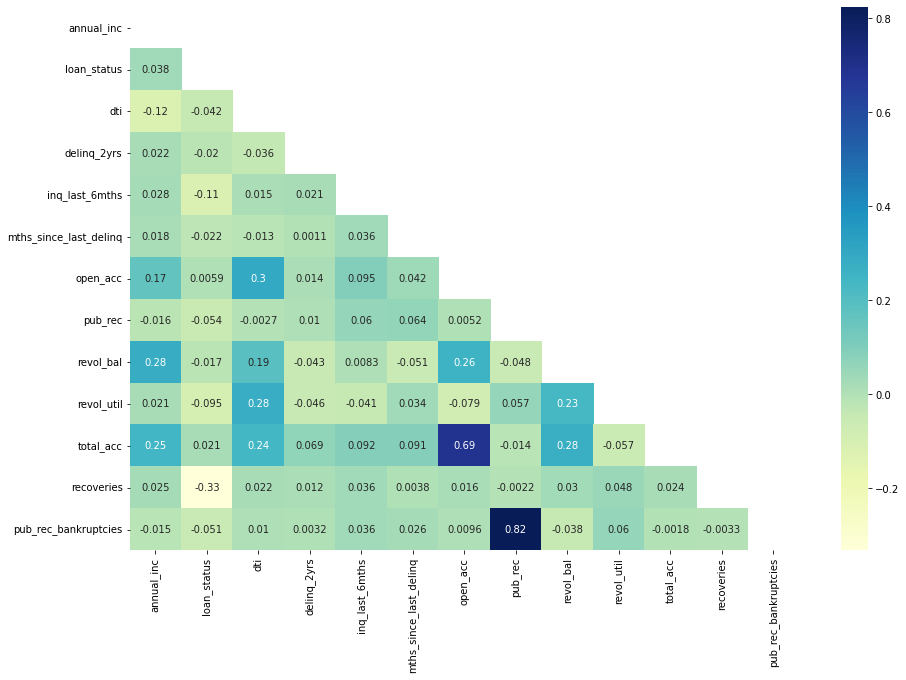

In [85]:
# Review of inter-feature correlation, consider action for highly correlated features.
plt.subplots(figsize=(15,10))

mask = np.triu(np.ones_like(df.corr())) # triangle mask to hide duplicates

sns.heatmap(df.corr(),cmap="YlGnBu", annot=True, mask=mask)

The correlation of pub_rec_banruptcies and pub_rec might be problematic.

In [86]:
for obj in df.columns[df.dtypes == 'O']:
    print(df[obj].value_counts())
    print('************************')

B    12389
A    10182
C     8740
D     6015
E     3394
F     1300
G      512
Name: grade, dtype: int64
************************
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1822
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1139
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     153
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64
************************
10+ years    9369
< 1 years    5061
2 years      4743
5 years      4569
3 years      4364
4 years      3649
1 years      3594
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64
************************
RENT        20180
MORTGAGE    18957
OWN          3251
OTHER         144
Name: home_ownership, dtype: int64
************************
Verified        23775
Not Verified    18757
Na

In [87]:
df.isna().sum()

grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
mths_since_last_delinq    0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
recoveries                0
pub_rec_bankruptcies      0
income_level              0
dtype: int64

In [88]:
df.duplicated().sum()

6

In [89]:
# reported duplicated is a false positive
df[df.duplicated()]

grade sub_grade emp_length home_ownership  annual_inc  \
981       A        A4  10+ years       MORTGAGE     97781.0   
1133      A        A3    5 years       MORTGAGE     30000.0   
1295      A        A4  < 1 years           RENT     75800.0   
1400      A        A2  < 1 years       MORTGAGE     78000.0   
1515      A        A2    5 years            OWN     71000.0   
20983     A        A3  < 1 years          OTHER     59000.0   

      verification_status  loan_status             purpose    dti  \
981              Verified            1              moving  17.59   
1133         Not Verified            1      major_purchase   0.00   
1295         Not Verified            1  debt_consolidation  13.41   
1400         Not Verified            1  debt_consolidation   5.60   
1515         Not Verified            1         credit_card   4.82   
20983        Not Verified            1               other   1.00   

       delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  \
981            0.0             1.0                    46.0      12.0      0.0   
1133           0.0             1.0                     0.0      11.0      0.0   
1295           0.0             0.0                     0.0      10.0      0.0   
1400           0.0             2.0                     0.0      11.0      0.0   
1515           0.0             1.0                    33.0       7.0      0.0   
20983          0.0             0.0                     0.0       9.0      0.0   

       revol_bal  revol_util  total_acc  recoveries  pub_rec_bankruptcies  \
981      46310.0        69.8       36.0         0.0                   0.0   
1133         0.0         0.0       16.0         0.0                   0.0   
1295         0.0         0.0       13.0         0.0                   0.0   
1400     13104.0        24.0       24.0         0.0                   0.0   
1515      8928.0        33.7       24.0         0.0                   0.0   
20983        0.0        49.7       20.0         0.0                   0.0   

      income_level  
981        80-100k  
1133     under-30k  
1295        70-79k  
1400        70-79k  
1515        70-79k  
20983       50-59k

#### Cleanded data

In [90]:
df.to_csv('lc_clean.csv',index=False)

# Model

In [91]:
#@title Split: df_train / df_val

df_full_train, df_test = train_test_split(df, test_size=0.3, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.loan_status.values
y_test = df_test.loan_status.values
y_val = df_val.loan_status.values

del df_train['loan_status']
del df_val['loan_status']
del df_test['loan_status']

In [92]:
df_train.shape, df_test.shape, df_val.shape

((22329, 19), (12760, 19), (7443, 19))

In [93]:
#@title x_train

train_dict = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
x_train = dv.fit_transform(train_dict)

In [94]:
#@title x_test

test_dict = df_test.to_dict(orient='records')
x_test = dv.transform(test_dict)

In [95]:
#@title x_val

val_dict = df_val.to_dict(orient='records')
x_val = dv.transform(val_dict)

In [96]:
#@title def model_run(models)

def model_run(models):
  for name, model in models:
      model = model
      model.fit(x_train, y_train)
      
      print(" ")
      print("Model: ",name)
      print('Validation Accuracy: ', accuracy_score(y_test, model.predict(x_test)))
      print('Training Accuracy: ', accuracy_score(y_train, model.predict(x_train)))
      print(" ")
      
      plt.figure()
      cf_matrix = confusion_matrix(y_test, model.predict(x_test))
      plt.title('Confusion Matrix: {}'.format(name))
      sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
      plt.show()
      
      print(" ")

      skplt.metrics.plot_roc(y_test, model.predict_proba(x_test))
      plt.title('ROC Curves: {}'.format(name))
      plt.show()

### Model Comparison

In [97]:
#@title Model Selection
models = [
          ('Logistic Regression', LogisticRegression(max_iter=4000,random_state=10)), # max_iter=4000 to avoid convergence error
          ('Decision Tree Classifier', DecisionTreeClassifier(random_state=10)),
          ('Random Forest', RandomForestClassifier(random_state=10)),
          ('Linear Discriminant Analyzer', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()),
          ('Support Vector Machine', SVC(probability=True, random_state=10)),
          ('Naive Bayes', ComplementNB()),
          ('Ada Boost', AdaBoostClassifier(random_state=10)),
          ('XG Boost', XGBClassifier(random_state=10)),
          ('Cat Boost', CatBoostClassifier(logging_level= 'Silent'))
          ]

 
Model:  Logistic Regression
Validation Accuracy:  0.993808777429467
Training Accuracy:  0.9949393165838147
 


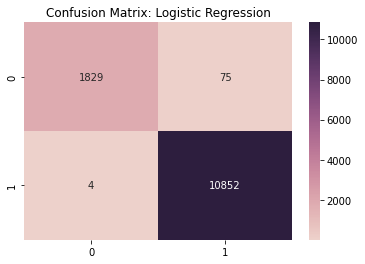

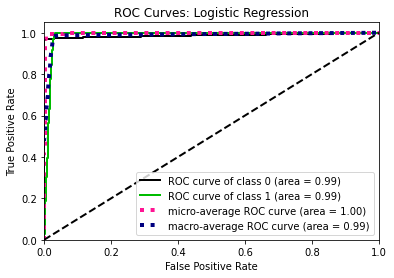

 
Model:  Decision Tree Classifier
Validation Accuracy:  0.995846394984326
Training Accuracy:  1.0
 


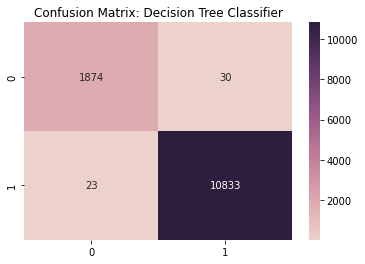

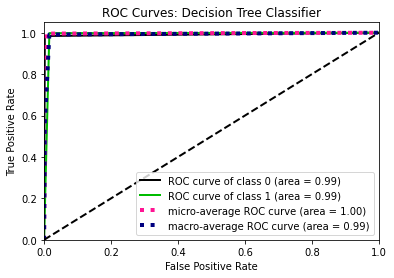

 
Model:  Random Forest
Validation Accuracy:  0.9974137931034482
Training Accuracy:  1.0
 


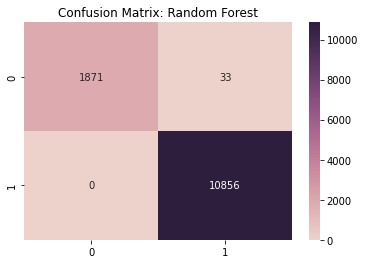

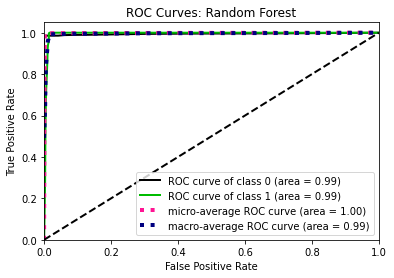

 
Model:  Linear Discriminant Analyzer
Validation Accuracy:  0.8677899686520376
Training Accuracy:  0.8677504590442922
 


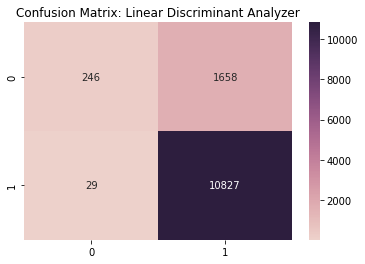

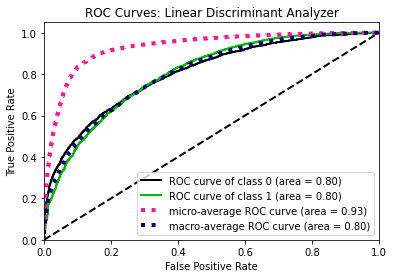

 
Model:  KNN


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:214: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  neigh_dist, neigh_ind = self.kneighbors(X)


Validation Accuracy:  0.862460815047022


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:214: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  neigh_dist, neigh_ind = self.kneighbors(X)


Training Accuracy:  0.8827981548658695
 


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:214: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  neigh_dist, neigh_ind = self.kneighbors(X)


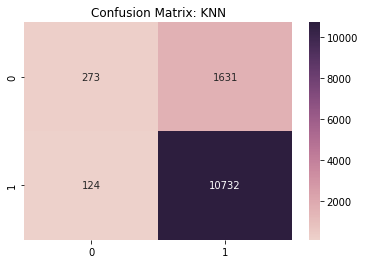

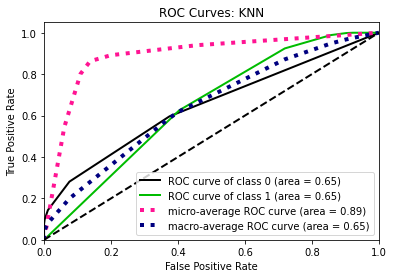

 
Model:  Support Vector Machine
Validation Accuracy:  0.8565830721003135
Training Accuracy:  0.8537775986385419
 


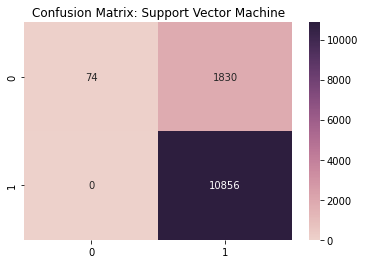

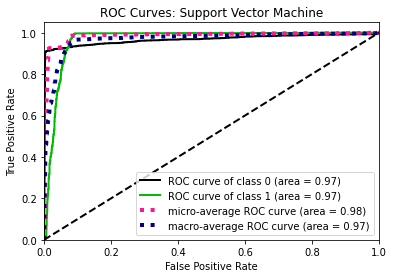

 
Model:  Naive Bayes
Validation Accuracy:  0.7648119122257053
Training Accuracy:  0.764521474315912
 


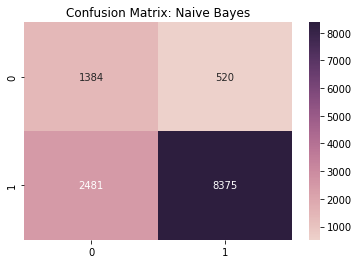

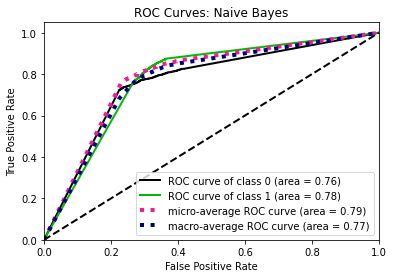

 
Model:  Ada Boost
Validation Accuracy:  0.9974921630094044
Training Accuracy:  0.9985668861122308
 


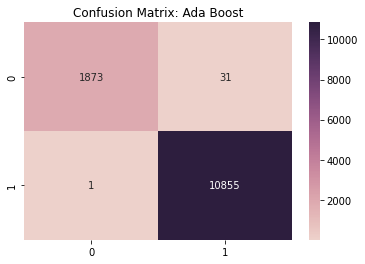

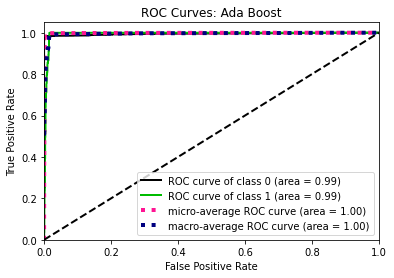

 
Model:  XG Boost
Validation Accuracy:  0.9976489028213166
Training Accuracy:  0.9986116709212235
 


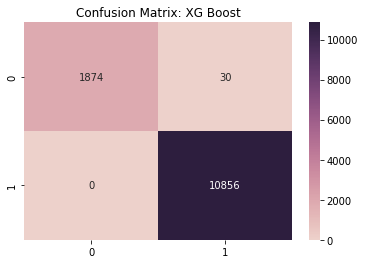

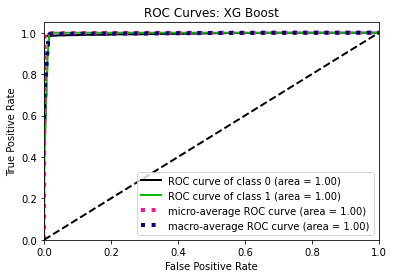

 
Model:  Cat Boost
Validation Accuracy:  0.9976489028213166
Training Accuracy:  0.9986116709212235
 


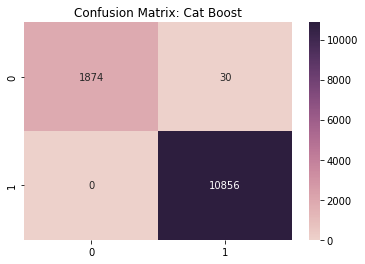

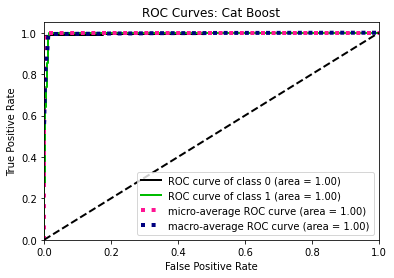

In [98]:
#@title Run all models
model_run(models)

## Possible Overfitting

In [99]:
#@title def val_model_run(models)

def val_model_run(models):
  for name, model in models:
      model = model
      model.fit(x_train, y_train)
      
      print(" ")
      print("Model: ",name)
      print('Validate Accuracy: ', accuracy_score(y_val, model.predict(x_val)))
      print(" ")
      
      plt.figure()
      cf_matrix = confusion_matrix(y_val, model.predict(x_val))
      plt.title('Confusion Matrix: {}'.format(name))
      sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
      plt.show()
      
      print(" ")

      skplt.metrics.plot_roc(y_val, model.predict_proba(x_val))
      plt.title('ROC Curves: {}'.format(name))
      plt.show()

In [100]:
#@title Validate Model Selection
test_models = [('Logistic Regression', LogisticRegression(max_iter=4000,random_state=10)),
          ('Decision Tree Classifier', DecisionTreeClassifier(random_state=10)),
          ('Random Forest', RandomForestClassifier(random_state=10)),
          ('Ada Boost', AdaBoostClassifier(random_state=1)),
          ('XG Boost', XGBClassifier(random_state=10)),
          ('Cat Boost', CatBoostClassifier(logging_level='Silent'))
          ]

 
Model:  Logistic Regression
Validate Accuracy:  0.994894531774822
 


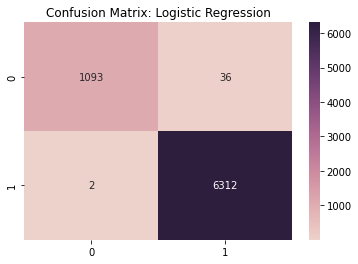

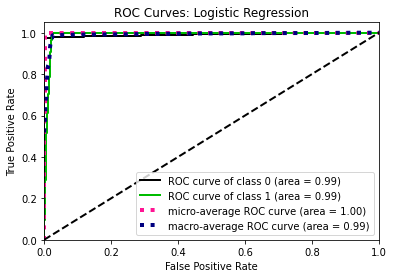

 
Model:  Decision Tree Classifier
Validate Accuracy:  0.9975816203143894
 


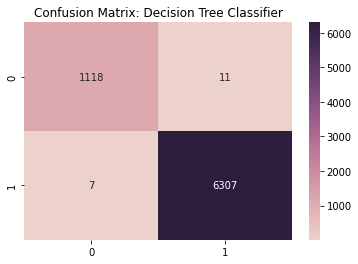

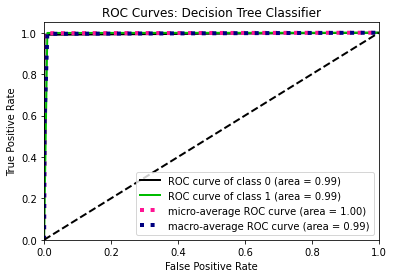

 
Model:  Random Forest
Validate Accuracy:  0.9983877468762595
 


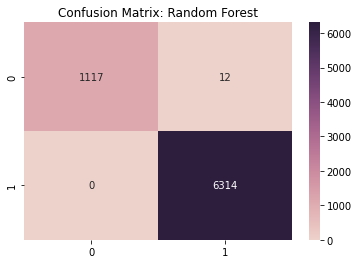

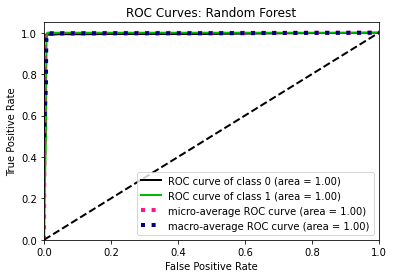

 
Model:  Ada Boost
Validate Accuracy:  0.9983877468762595
 


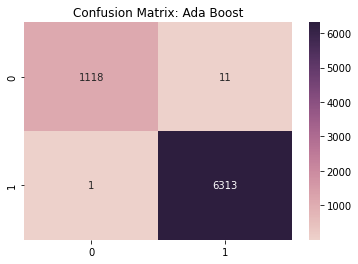

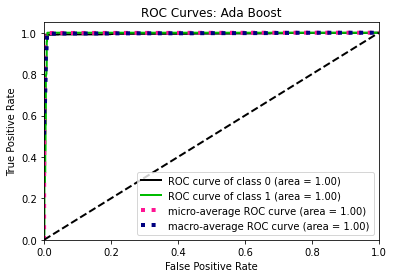

 
Model:  XG Boost
Validate Accuracy:  0.9985221013032379
 


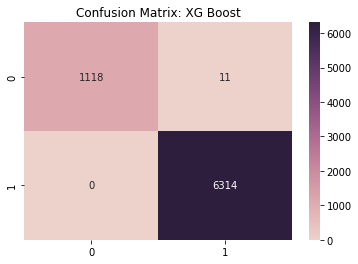

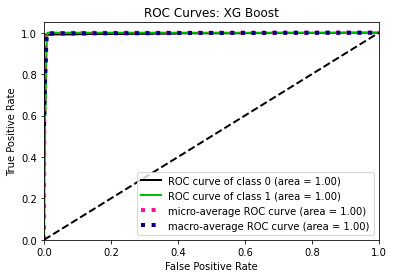

 
Model:  Cat Boost
Validate Accuracy:  0.9985221013032379
 


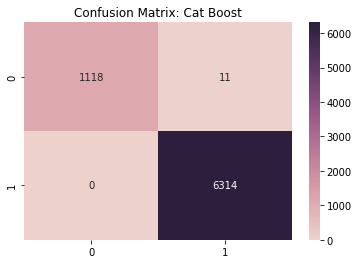

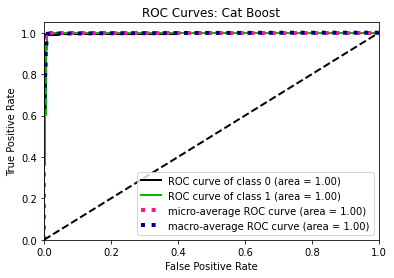

In [101]:
#@title Validate for overfitting models
val_model_run(test_models)

XG Boost and Cat Boost performed the best on validation data. The few cusotmers approved but should not have are added risk and may potentially reduce business profitability. 

# Tuning

## XG Boost

XGBClassifier(random_state=10)

### Baseline

In [102]:
xgb_model = XGBClassifier(random_state=10)

In [103]:
# define the datasets to evaluate each iteration
xgb_evalset = [(x_train, y_train), (x_test,y_test)]

In [104]:
xgb_model.fit(x_train, y_train, eval_metric='logloss', eval_set=xgb_evalset)

[0]	validation_0-logloss:0.598816	validation_1-logloss:0.598943
[1]	validation_0-logloss:0.521273	validation_1-logloss:0.521723
[2]	validation_0-logloss:0.456781	validation_1-logloss:0.457314
[3]	validation_0-logloss:0.402285	validation_1-logloss:0.402987
[4]	validation_0-logloss:0.35571	validation_1-logloss:0.356613
[5]	validation_0-logloss:0.315708	validation_1-logloss:0.316684
[6]	validation_0-logloss:0.280922	validation_1-logloss:0.28208
[7]	validation_0-logloss:0.250652	validation_1-logloss:0.251877
[8]	validation_0-logloss:0.224118	validation_1-logloss:0.225481
[9]	validation_0-logloss:0.200758	validation_1-logloss:0.202251
[10]	validation_0-logloss:0.180265	validation_1-logloss:0.181811
[11]	validation_0-logloss:0.162	validation_1-logloss:0.163726
[12]	validation_0-logloss:0.145904	validation_1-logloss:0.147672
[13]	validation_0-logloss:0.13152	validation_1-logloss:0.13344
[14]	validation_0-logloss:0.118743	validation_1-logloss:0.120775
[15]	validation_0-logloss:0.107393	validat

XGBClassifier(random_state=10)

In [105]:
# evaluate performance
yhat = xgb_model.predict(x_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.6f' % score)

Accuracy: 0.997649


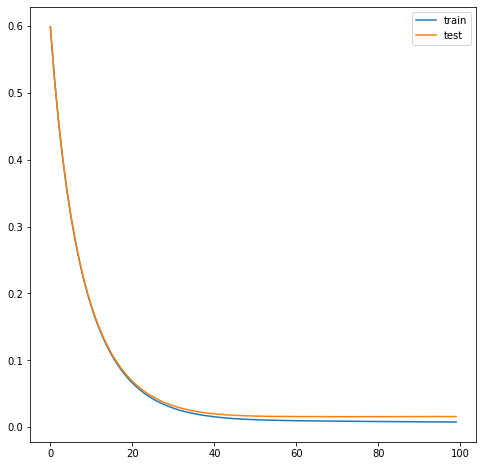

In [106]:
results = xgb_model.evals_result()

plt.figure(figsize=(8,8))
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot

plt.show()

### increase estimators

[0]	validation_0-logloss:0.598816	validation_1-logloss:0.598943
[1]	validation_0-logloss:0.521273	validation_1-logloss:0.521723
[2]	validation_0-logloss:0.456781	validation_1-logloss:0.457314
[3]	validation_0-logloss:0.402285	validation_1-logloss:0.402987
[4]	validation_0-logloss:0.35571	validation_1-logloss:0.356613
[5]	validation_0-logloss:0.315708	validation_1-logloss:0.316684
[6]	validation_0-logloss:0.280922	validation_1-logloss:0.28208
[7]	validation_0-logloss:0.250652	validation_1-logloss:0.251877
[8]	validation_0-logloss:0.224118	validation_1-logloss:0.225481
[9]	validation_0-logloss:0.200758	validation_1-logloss:0.202251
[10]	validation_0-logloss:0.180265	validation_1-logloss:0.181811
[11]	validation_0-logloss:0.162	validation_1-logloss:0.163726
[12]	validation_0-logloss:0.145904	validation_1-logloss:0.147672
[13]	validation_0-logloss:0.13152	validation_1-logloss:0.13344
[14]	validation_0-logloss:0.118743	validation_1-logloss:0.120775
[15]	validation_0-logloss:0.107393	validat

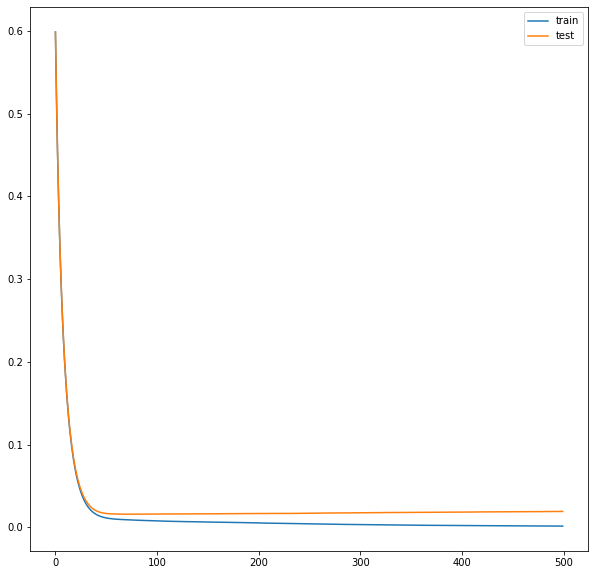

In [107]:
# increase estimators
xgb_model = XGBClassifier(n_estimators=500)

# fit the xgb_model
xgb_model.fit(x_train, y_train, eval_metric='logloss', eval_set=xgb_evalset)
# evaluate performance
yhat = xgb_model.predict(x_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.6f' % score)
# retrieve performance metrics
results = xgb_model.evals_result()

plt.figure(figsize=(10,10))
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

**No imporvement from increasing estimators.**



###  slower learning rate

[0]	validation_0-logloss:0.598816	validation_1-logloss:0.598943
[1]	validation_0-logloss:0.521273	validation_1-logloss:0.521723
[2]	validation_0-logloss:0.456781	validation_1-logloss:0.457314
[3]	validation_0-logloss:0.402285	validation_1-logloss:0.402987
[4]	validation_0-logloss:0.35571	validation_1-logloss:0.356613
[5]	validation_0-logloss:0.315708	validation_1-logloss:0.316684
[6]	validation_0-logloss:0.280922	validation_1-logloss:0.28208
[7]	validation_0-logloss:0.250652	validation_1-logloss:0.251877
[8]	validation_0-logloss:0.224118	validation_1-logloss:0.225481
[9]	validation_0-logloss:0.200758	validation_1-logloss:0.202251
[10]	validation_0-logloss:0.180265	validation_1-logloss:0.181811
[11]	validation_0-logloss:0.162	validation_1-logloss:0.163726
[12]	validation_0-logloss:0.145904	validation_1-logloss:0.147672
[13]	validation_0-logloss:0.13152	validation_1-logloss:0.13344
[14]	validation_0-logloss:0.118743	validation_1-logloss:0.120775
[15]	validation_0-logloss:0.107393	validat

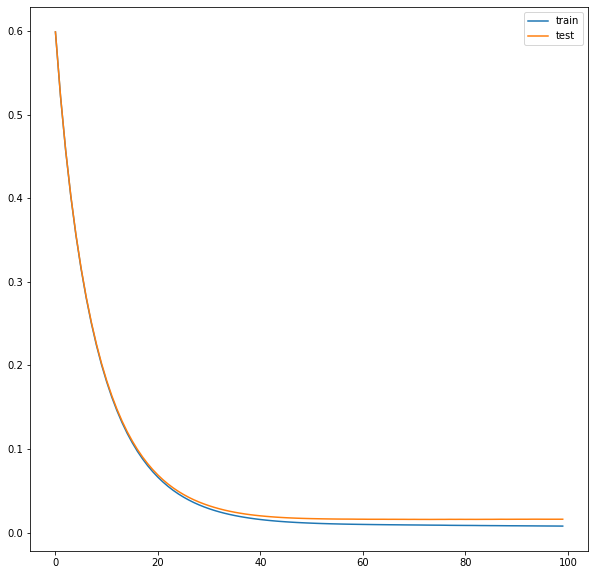

In [108]:
#@title slower learning rate

xgb_model = XGBClassifier(eta=0.05)
# fit the
xgb_model.fit(x_train, y_train, eval_metric='logloss', eval_set=xgb_evalset)
# evaluate performance
yhat = xgb_model.predict(x_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.6f' % score)
# retrieve performance metrics
results = xgb_model.evals_result()

plt.figure(figsize=(10,10))
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

**No imporvement from slower learning rate.**

### slower sampling with regularization

[0]	validation_0-logloss:0.598843	validation_1-logloss:0.598974
[1]	validation_0-logloss:0.559832	validation_1-logloss:0.559877
[2]	validation_0-logloss:0.488937	validation_1-logloss:0.489152
[3]	validation_0-logloss:0.429344	validation_1-logloss:0.429809
[4]	validation_0-logloss:0.4066	validation_1-logloss:0.406868
[5]	validation_0-logloss:0.387326	validation_1-logloss:0.387618
[6]	validation_0-logloss:0.371176	validation_1-logloss:0.371315
[7]	validation_0-logloss:0.328311	validation_1-logloss:0.328725
[8]	validation_0-logloss:0.316494	validation_1-logloss:0.316823
[9]	validation_0-logloss:0.280936	validation_1-logloss:0.28153
[10]	validation_0-logloss:0.27219	validation_1-logloss:0.272677
[11]	validation_0-logloss:0.24235	validation_1-logloss:0.243069
[12]	validation_0-logloss:0.236069	validation_1-logloss:0.236762
[13]	validation_0-logloss:0.23073	validation_1-logloss:0.231436
[14]	validation_0-logloss:0.2059	validation_1-logloss:0.206827
[15]	validation_0-logloss:0.201487	validati

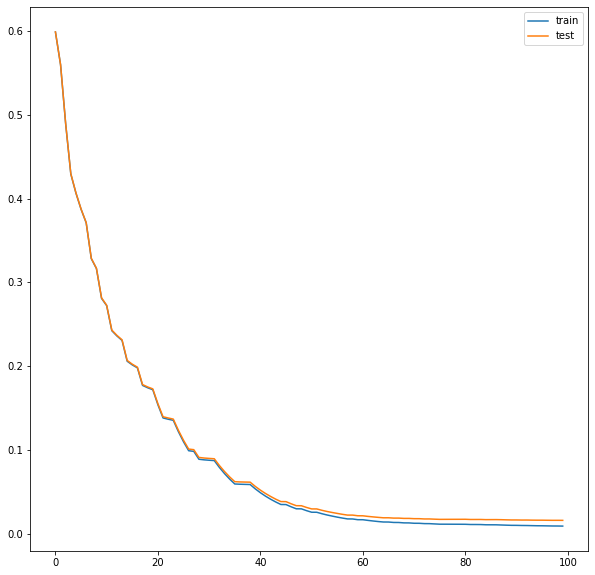

In [109]:
#@title slower sampling with regularization

xgb_model = XGBClassifier(eta=0.05,subsample=0.5, colsample_bytree=0.5)

# fit the xgb_model
xgb_model.fit(x_train, y_train, eval_metric='logloss', eval_set=xgb_evalset)
# evaluate performance
yhat = xgb_model.predict(x_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.6f' % score)
# retrieve performance metrics
results = xgb_model.evals_result()

plt.figure(figsize=(10,10))
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

**No imporvement from slower learning rate with regularization.**

### XGB Conclusion

The default settings for XGBoost are sufficient relative to the tuning testing.

## Cat Boost

CatBoostClassifier(logging_level='Silent')

In [110]:
cat_model = CatBoostClassifier(logging_level='Silent')

In [127]:
cat_params = {
          'max_depth': range (2, 10, 1),
          'n_estimators': range(60, 220, 40),
          'learning_rate': [0.1, 0.01, 0.05]
          }

### Grid Search

In [128]:
# simple grid search
grid_search_result = cat_model.grid_search(cat_params, 
                                       X=x_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.0102408	best: 0.0102408 (0)	total: 375ms	remaining: 35.6s
1:	loss: 0.0629948	best: 0.0102408 (0)	total: 736ms	remaining: 34.6s
2:	loss: 0.0104820	best: 0.0102408 (0)	total: 1.07s	remaining: 33.1s
3:	loss: 0.0101174	best: 0.0101174 (3)	total: 2.04s	remaining: 46.9s
4:	loss: 0.0236905	best: 0.0101174 (3)	total: 2.57s	remaining: 46.8s
5:	loss: 0.0101827	best: 0.0101174 (3)	total: 3.08s	remaining: 46.2s
6:	loss: 0.0101174	best: 0.0101174 (3)	total: 3.8s	remaining: 48.3s
7:	loss: 0.0148060	best: 0.0101174 (3)	total: 5.03s	remaining: 55.3s
8:	loss: 0.0101540	best: 0.0101174 (3)	total: 5.71s	remaining: 55.2s
9:	loss: 0.0101174	best: 0.0101174 (3)	total: 7.05s	remaining: 1m
10:	loss: 0.0121508	best: 0.0101174 (3)	total: 8.03s	remaining: 1m 2s
11:	loss: 0.0101221	best: 0.0101174 (3)	total: 9.34s	remaining: 1m 5s
12:	loss: 0.0101230	best: 0.0101174 (3)	total: 10.1s	remaining: 1m 4s
13:	loss: 0.0622227	best: 0.0101174 (3)	total: 10.5s	remaining: 1m 1s
14:	loss: 0.0103708	best: 0.010117

### Grid Search Results

In [136]:
pd.DataFrame(grid_search_result)

params                                         cv_results
depth                 8.00                                                NaN
iterations          180.00  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
learning_rate         0.05                                                NaN
test-Logloss-mean      NaN  [0.5500746871934421, 0.4517143542698841, 0.355...
test-Logloss-std       NaN  [0.002369231830232793, 0.0015893062114477625, ...
train-Logloss-mean     NaN  [0.5500973940977113, 0.45174238670871203, 0.35...
train-Logloss-std      NaN  [0.00202340168141281, 0.000687040317828513, 0....

In [147]:
cat_final = [('Cat Final',CatBoostClassifier(max_depth=8,n_estimators=180,learning_rate=0.05,logging_level='Silent'))]

 
Model:  Cat Final
Validation Accuracy:  0.9976489028213166
Training Accuracy:  0.9986564557302163
 


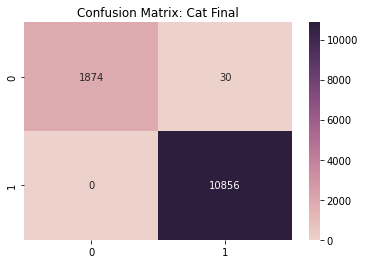

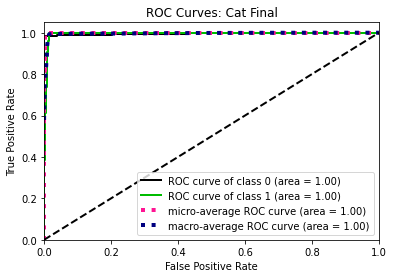

In [148]:
model_run(cat_final)

### Cat Boost Conclusion

**Tuning did not improve from base model.**

# Deployment

In [149]:
# Neither of the final models out performeed the other. XGBoost selected
final_model = XGBClassifier(random_state=10)

## Data prep

In [173]:
#@title Split: df_full_train / df_test

df_full_train, df_test_small = train_test_split(df, test_size=0.1, random_state=1)

df_full_train = df_full_train.reset_index(drop=True)
df_test_small = df_test_small.reset_index(drop=True)

y_full_train = df_full_train.loan_status.values
y_test_small = df_test_small.loan_status.values


In [174]:
df_full_train.to_csv('lc_test.csv',index=False)

In [160]:
# Decline for loan (loan_status = 0)
df_test_small.iloc[4211]

grade                               C
sub_grade                          C2
emp_length                  < 1 years
home_ownership                   RENT
annual_inc                    33000.0
verification_status          Verified
loan_status                         0
purpose                   credit_card
dti                              4.55
delinq_2yrs                       0.0
inq_last_6mths                    0.0
mths_since_last_delinq           26.0
open_acc                          8.0
pub_rec                           0.0
revol_bal                      4959.0
revol_util                       64.6
total_acc                        26.0
recoveries                      54.07
pub_rec_bankruptcies              0.0
income_level                   30-39k
Name: 4211, dtype: object

In [161]:
# Approved for loan (loan_status = 1)
df_test_small.iloc[4248]

grade                               G
sub_grade                          G1
emp_length                  10+ years
home_ownership               MORTGAGE
annual_inc                   120000.0
verification_status          Verified
loan_status                         1
purpose                         house
dti                              24.0
delinq_2yrs                       0.0
inq_last_6mths                    0.0
mths_since_last_delinq           59.0
open_acc                         14.0
pub_rec                           0.0
revol_bal                     18199.0
revol_util                       71.4
total_acc                        35.0
recoveries                        0.0
pub_rec_bankruptcies              0.0
income_level              100-150000k
Name: 4248, dtype: object

In [162]:
del df_full_train['loan_status']
del df_test_small['loan_status']

In [163]:
#@title x_full_train

train_full_dict = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
x_full_train = dv.fit_transform(train_full_dict)

In [164]:
#@title x_test_small

test_small_dict = df_test_small.to_dict(orient='records')
x_test_small = dv.transform(test_small_dict)

In [167]:
final_model.fit(x_full_train, y_full_train)

XGBClassifier(random_state=10)

## Bentoml

In [170]:
# save model from notebook
bentoml.sklearn.save_model('loan_approval', final_model, 
                           custom_objects={
                               'dicVectorizer': dv
                           },
                           signatures = {"predict_proba": {"batchable": False}}
                           )

Model(tag="loan_approval:oxs6xwucegze6asc", path="/root/bentoml/models/loan_approval/oxs6xwucegze6asc/")

In [171]:
%%writefile service.py

import bentoml
from bentoml.io import JSON
import numpy as np

model_ref = bentoml.sklearn.get('loan_approval:latest')
dv = model_ref.custom_objects['dicVectorizer']

model_runner = model_ref.to_runner()

svc = bentoml.Service('loan_approval', runners=[model_runner])

@svc.api(input= JSON.from_sample({
        "sub_grade":  "G1"
        "emp_length": "10+ years"
        "home_ownership": "MORTGAGE"
        "annual_inc":  120000.0
        "verification_status":  "Verified"
        "loan_status":  1
        "purpose":  "house"
        "dti":  24.0
        "delinq_2yrs":  0.0
        "inq_last_6mths": 0.0
        "mths_since_last_delinq": 59.0
        "open_acc": 14.0
        "pub_rec":  0.0
        "revol_bal":  18199.0
        "revol_util": 71.4
        "total_acc":  35.0
        "recoveries": 0.0
        "pub_rec_bankruptcies": 0.0
        "income_level": "100-150000k"
        }), 
        output= JSON())
def classify(application_data):
    vector = dv.transform(application_data)
    prediction = model_runner.predict_proba.run(vector)
    # np.format_float_positional returns a string
    round_predict = float(np.format_float_positional(prediction[:,1], precision=2))

    if round_predict < 0.50:
        return 'Decline: Credit Risk High'
    elif (round_predict > 80):
        return 'Approved: Credit Risk Low'
    else:
        return 'Approved: Credit Risk Moderate'

Writing service.py


In [172]:
%%writefile bentofile.yaml

service: "service.py:svc"
labels:
  owner: Gregory Morris
  project: MLZoomcamp capstone-1 project
include:
- "*.py"
python:
    packages:  # Additional pip packages required by the service
    - scikit-learn
    - numpy
    - bentoml

Writing bentofile.yaml


**bentoml commands:**
* build bento: `bentoml build`

* docker container: `bentoml containerize [bento name:code given after 'bentoml build']`

* *make sure docker service is running if setting up locally. Then run this command line:*

    * run docker contianer: `docker run -it --rm -p 3000:3000 [bento name:code given after 'bentoml build'] serve --production`

## AWS
See README.md for AWS instructions.

## Production App Access
See README.md for App access instructions.

## Model Script

In [177]:
%%writefile training.py

import bentoml
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd

# model Selection
model = XGBClassifier(random_state=10)

# Preprocessing
df_train = pd.read_csv('lc_clean.csv')

df_full_train, df_test_small = train_test_split(df, test_size=0.1, random_state=1)

# df_test_small see lc_test.csv
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = df_full_train.loan_status.values

del df_full_train['loan_status']

train_full_dict = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
x_full_train = dv.fit_transform(train_full_dict)

# train model
model.fit(x_full_train, y_full_train)


# save model with bentoml
bentoml.sklearn.save_model('loan_approval', final_model, 
                           custom_objects={
                               'dicVectorizer': dv
                           },
                           signatures = {"predict_proba": {"batchable": False}}
                           )


Overwriting training.py
